### First Phase of Model Building | using Afinn.csv

In [1]:
import pandas as pd

In [2]:
# HELPER CODES
# from PIL import Image
# from plotly import tools
# from plotly.offline import init_notebook_mode,iplot,plot
# from nrclex import NRCLex

In [3]:
df = pd.read_excel(r"C:\Users\Abel\Downloads\Book.xlsx")
df.head()

,customer,review
0,Diksha Suman (@beingsheblog),Title: THINK AND GROW RICHAuthor: NAPOLEON H...
1,Naveen Sharma,It took quarter of a century to accumulate i...
2,SAINATH REDDY,When you face criticism in your life try to ...
3,Debojit,I was looking through some of the reviews an...
4,BhaveshB.O.T™,This book can also be called as Think and Gr...


In [4]:
df.dropna(inplace=True)
df.isnull().sum()

customer    0
review      0
dtype: int64

In [5]:
# !pip install afinn
# from afinn import Afinn
# afinn = Afinn(language='en')
afinn = pd.read_csv('E:/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [6]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [7]:
import re
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# for tokenization
nltk.download('punkt')
# for stopwords
nltk.download('stopwords')
# for lemmatisation
nltk.download('wordnet')
from nltk.corpus import stopwords
stop = stopwords.words('english')
review_list=[]
for review in df['review']:
    no_punct_review=re.sub("[^a-zA-Z]", " ", review)
    norm_review=no_punct_review.lower()
    tokenized_review=nltk.word_tokenize(norm_review)
    review_tokens=[word for word in tokenized_review if not word in set(stopwords.words("english"))]
    lemma=nltk.WordNetLemmatizer()
    lemmatised_reviews=[lemma.lemmatize(word) for word in review_tokens]
    lemmatised_string=" ".join(lemmatised_reviews)
    review_list.append(lemmatised_string)
df["normalised_reviews"]=review_list
df.head(5)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,customer,review,normalised_reviews
0,Diksha Suman (@beingsheblog),Title: THINK AND GROW RICHAuthor: NAPOLEON H...,title think grow richauthor napoleon hillpubli...
1,Naveen Sharma,It took quarter of a century to accumulate i...,took quarter century accumulate information wr...
2,SAINATH REDDY,When you face criticism in your life try to ...,face criticism life try turn page book find wa...
3,Debojit,I was looking through some of the reviews an...,looking review see people gave five star gave ...
4,BhaveshB.O.T™,This book can also be called as Think and Gr...,book also called think grow skill think grow k...


In [8]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')

def calculate_sentiment(text: str = None):
    sentiment_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sentiment_score += affinity_scores.get(word.lemma_, 0)
    return sentiment_score

In [10]:
df['sentiment_value'] = df['normalised_reviews'].apply(calculate_sentiment)
df

,customer,review,normalised_reviews,sentiment_value
0,Diksha Suman (@beingsheblog),Title: THINK AND GROW RICHAuthor: NAPOLEON H...,title think grow richauthor napoleon hillpubli...,21
1,Naveen Sharma,It took quarter of a century to accumulate i...,took quarter century accumulate information wr...,21
2,SAINATH REDDY,When you face criticism in your life try to ...,face criticism life try turn page book find wa...,7
3,Debojit,I was looking through some of the reviews an...,looking review see people gave five star gave ...,14
4,BhaveshB.O.T™,This book can also be called as Think and Gr...,book also called think grow skill think grow k...,32
...,...,...,...,...
1995,Dipesh,"Can't explain, everyone please read.",explain everyone please read,1
1996,AkshAr KalathiYa,Book is really nice and print is also good,book really nice print also good,6
1997,yamjalamallesh,I call it as granddaddy of all inspirational...,call granddaddy inspirational motivational lit...,6
1998,suprith m,Poor qualityPurchase from other publications,poor qualitypurchase publication,-2


In [11]:
df.sort_values(by='sentiment_value').head()

,customer,review,normalised_reviews,sentiment_value
228,Siddhant,The quality of this book is very nice as I e...,quality book nice expected one problem often f...,-7
77,HonestlyYours,The Book I received 2 months back is really ...,book received month back really pathetic copy ...,-7
986,Achuthanj,No problem in book knowledge. But i have pro...,problem book knowledge problem book print qual...,-7
57,Pihu,"First review on amazon, had to write it as I...",first review amazon write bear overhyped book ...,-6
49,Poornima Khurana,success does not require justification and f...,success require justification failure spare al...,-6


D:\Installation\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

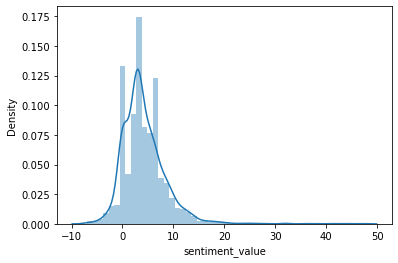

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['sentiment_value'])

In [13]:
df['index']=range(0,len(df))
df
# positive,negative zero reviews

,customer,review,normalised_reviews,sentiment_value,index
0,Diksha Suman (@beingsheblog),Title: THINK AND GROW RICHAuthor: NAPOLEON H...,title think grow richauthor napoleon hillpubli...,21,0
1,Naveen Sharma,It took quarter of a century to accumulate i...,took quarter century accumulate information wr...,21,1
2,SAINATH REDDY,When you face criticism in your life try to ...,face criticism life try turn page book find wa...,7,2
3,Debojit,I was looking through some of the reviews an...,looking review see people gave five star gave ...,14,3
4,BhaveshB.O.T™,This book can also be called as Think and Gr...,book also called think grow skill think grow k...,32,4
...,...,...,...,...,...
1995,Dipesh,"Can't explain, everyone please read.",explain everyone please read,1,1994
1996,AkshAr KalathiYa,Book is really nice and print is also good,book really nice print also good,6,1995
1997,yamjalamallesh,I call it as granddaddy of all inspirational...,call granddaddy inspirational motivational lit...,6,1996
1998,suprith m,Poor qualityPurchase from other publications,poor qualitypurchase publication,-2,1997


<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

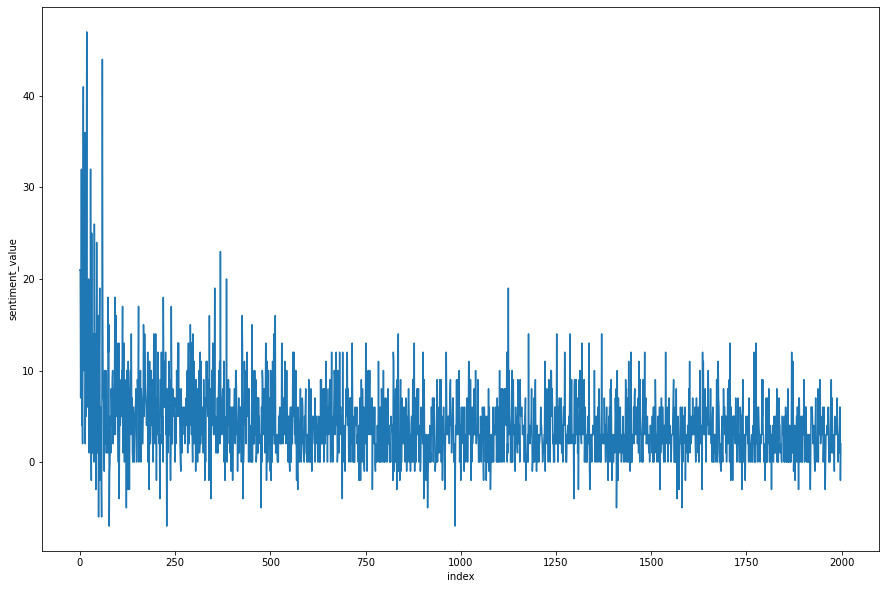

In [14]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=df)

In [15]:
df['word_count'] = df['normalised_reviews'].str.split().apply(len)
df.head(10)

,customer,review,normalised_reviews,sentiment_value,index,word_count
0,Diksha Suman (@beingsheblog),Title: THINK AND GROW RICHAuthor: NAPOLEON H...,title think grow richauthor napoleon hillpubli...,21,0,76
1,Naveen Sharma,It took quarter of a century to accumulate i...,took quarter century accumulate information wr...,21,1,75
2,SAINATH REDDY,When you face criticism in your life try to ...,face criticism life try turn page book find wa...,7,2,40
3,Debojit,I was looking through some of the reviews an...,looking review see people gave five star gave ...,14,3,99
4,BhaveshB.O.T™,This book can also be called as Think and Gr...,book also called think grow skill think grow k...,32,4,93
5,Vivek Dhungav,This book is high class and more valuable wh...,book high class valuable power change life sur...,4,5,20
6,Varub Bansal,Don't read reviews. If you want to get reach...,read review want get reach get book jaico publ...,7,6,24
7,Shubham Padwal,This is a review of Think and Grow Rich (Pen...,review think grow rich penguin random house re...,2,7,30
8,Aditya Basu Dhar,Go buy the purple/blue colored Think and Gro...,go buy purple blue colored think grow rich pub...,15,8,44
9,Abhiishek Mohta,"There was an idea, Andrew Carnegie and Napol...",idea andrew carnegie napolean hill knew called...,41,9,210


In [16]:
df["normalised_reviews"] 

0       title think grow richauthor napoleon hillpubli...
1       took quarter century accumulate information wr...
2       face criticism life try turn page book find wa...
3       looking review see people gave five star gave ...
4       book also called think grow skill think grow k...
                              ...                        
1995                         explain everyone please read
1996                     book really nice print also good
1997    call granddaddy inspirational motivational lit...
1998                     poor qualitypurchase publication
1999    economic thing world money buy may worth milio...
Name: normalised_reviews, Length: 1999, dtype: object

In [17]:
def rating_allocator(x):
    if int(x) > 10:
        x = "positive"
    else:
        x = "negative"
    return x
df["sentiment"] = df["sentiment_value"].apply(rating_allocator)

In [18]:
def rating_allocator(x):
    if int(x) > 4:
        x = "positive"
    elif (int(x) > -2 and int(x) < 4):
        x = "neutral"
    else:
        x = "negative"
    return x
df["sentiment"] = df["sentiment_value"].apply(rating_allocator)
df.head()

,customer,review,normalised_reviews,sentiment_value,index,word_count,sentiment
0,Diksha Suman (@beingsheblog),Title: THINK AND GROW RICHAuthor: NAPOLEON H...,title think grow richauthor napoleon hillpubli...,21,0,76,positive
1,Naveen Sharma,It took quarter of a century to accumulate i...,took quarter century accumulate information wr...,21,1,75,positive
2,SAINATH REDDY,When you face criticism in your life try to ...,face criticism life try turn page book find wa...,7,2,40,positive
3,Debojit,I was looking through some of the reviews an...,looking review see people gave five star gave ...,14,3,99,positive
4,BhaveshB.O.T™,This book can also be called as Think and Gr...,book also called think grow skill think grow k...,32,4,93,positive


In [19]:
df["sentiment"].value_counts()

neutral     989
positive    764
negative    246
Name: sentiment, dtype: int64

In [20]:
df.to_csv("project_viz1.csv")

In [21]:
# # pd.set_option("display.max_columns", "display.max_rows")
# df[df["sentiment_value"] == 20]["review"]

In [22]:
# decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
# def decode_sentiment(label):
#     return decode_map[int(label)]

<AxesSubplot:title={'center':'Box plot for sentiment values'}>

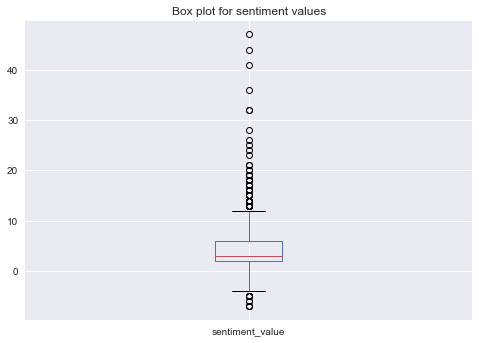

In [23]:
from matplotlib import style
plt.style.use("seaborn")
df["sentiment_value"].plot(kind = "box",  title = "Box plot for sentiment values")

<AxesSubplot:title={'center':'Histogram for sentiment values'}, ylabel='Frequency'>

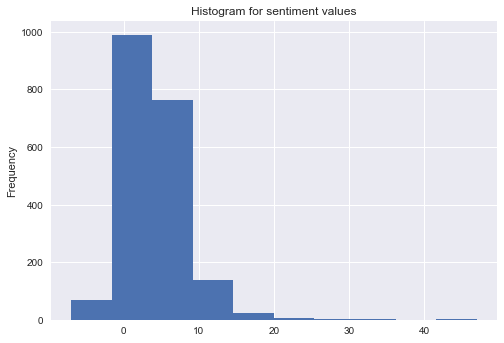

In [24]:
from matplotlib import style
plt.style.use("seaborn")
df["sentiment_value"].plot(kind = "hist", title = "Histogram for sentiment values")

In [25]:
df["sentiment_value"].describe()

count    1999.000000
mean        4.176088
std         4.389222
min        -7.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        47.000000
Name: sentiment_value, dtype: float64

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

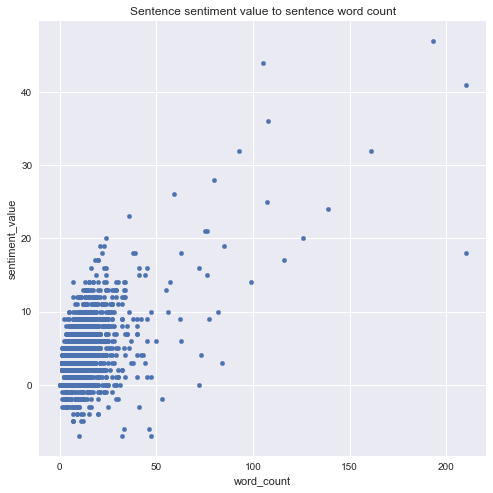

In [26]:

df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [27]:
from PIL import Image
import numpy as np
# bookimage = np.array(Image.open("sample_data/book_image.png"))
# bookimage.shape

In [28]:
def wordcloud(char,img_path,color):
    plt.subplots(figsize=(15,10))
    mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=STOPWORDS, 
                   mask=mask, background_color="white", contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=120)
    wc.generate(' '.join(char))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    width=mask.shape[1],
                  #  height=mask.shape[0]
                  # contour_width=2

In [29]:
# wordcloud(df["normalised_reviews"], "mickeymouse.png", "orange")

In [30]:
# wordcloud(df["normalised_reviews"], "sample_data/kidwithbook.png", "orange")

In [31]:
# wordcloud(df["normalised_reviews"], "emoji.png", "white")

In [32]:
# wordcloud(df["normalised_reviews"], "user.png", "white")

In [33]:
# wordcloud(df["normalised_reviews"], "thumbss.png", "white")

## N gram Analysis
Unigram Analysis

In [34]:
def word_freq(dataframe, n = None):
    x = CountVectorizer().fit(dataframe)
    bag_of_words = x.transform(dataframe)
    sum_words = bag_of_words.sum(axis=0)
    # word_list = x.vocabulary_.items()
    words_freq = [(word, sum_words[0, idx]) for word, idx in x.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [35]:
top_20 = word_freq(df["normalised_reviews"], 20)
top20_df = pd.DataFrame(top_20, columns = ["Word", "Frequency"])
top20_df

,Word,Frequency
0,book,2220
1,read,768
2,good,544
3,life,389
4,one,313
5,must,274
6,quality,271
7,great,233
8,best,211
9,rich,208


<AxesSubplot:xlabel='Word', ylabel='Frequency'>

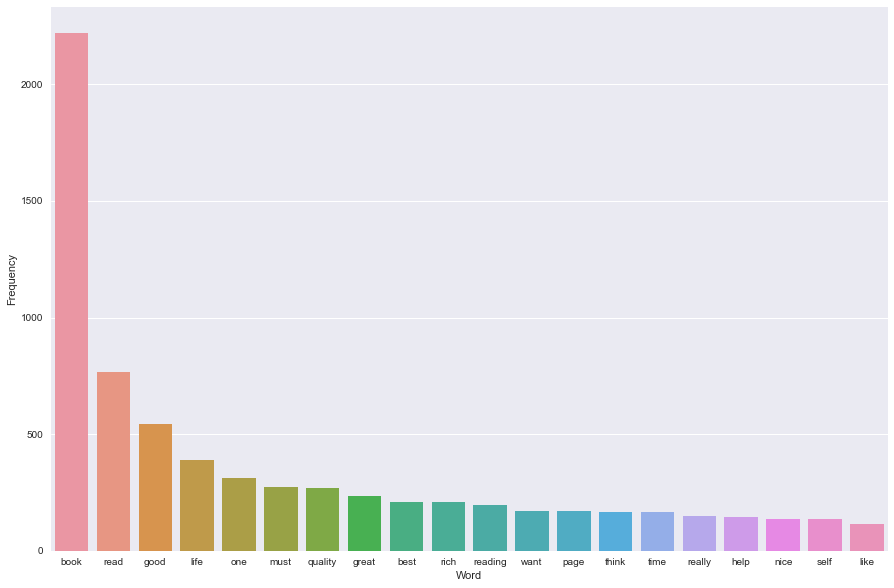

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x = "Word", y = "Frequency", data = top20_df )

## Bigram Analysis

In [37]:
def bigram_word_freq(dataframe, n = None):
    x = CountVectorizer(ngram_range = (2,2)).fit(dataframe)
    bag_of_words = x.transform(dataframe)
    sum_words = bag_of_words.sum(axis=0)
    # word_list = x.vocabulary_.items()
    words_freq = [(word, sum_words[0, idx]) for word, idx in x.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [38]:
bigram_freq = bigram_word_freq(df["normalised_reviews"],20)
bigram_df = pd.DataFrame(bigram_freq, columns = ["Bigrams", "Frequency"])
bigram_df

,Bigrams,Frequency
0,must read,212
1,read book,190
2,good book,132
3,best book,104
4,book read,89
5,great book,82
6,grow rich,78
7,think grow,72
8,one best,70
9,nice book,69


<AxesSubplot:xlabel='Bigrams', ylabel='Frequency'>

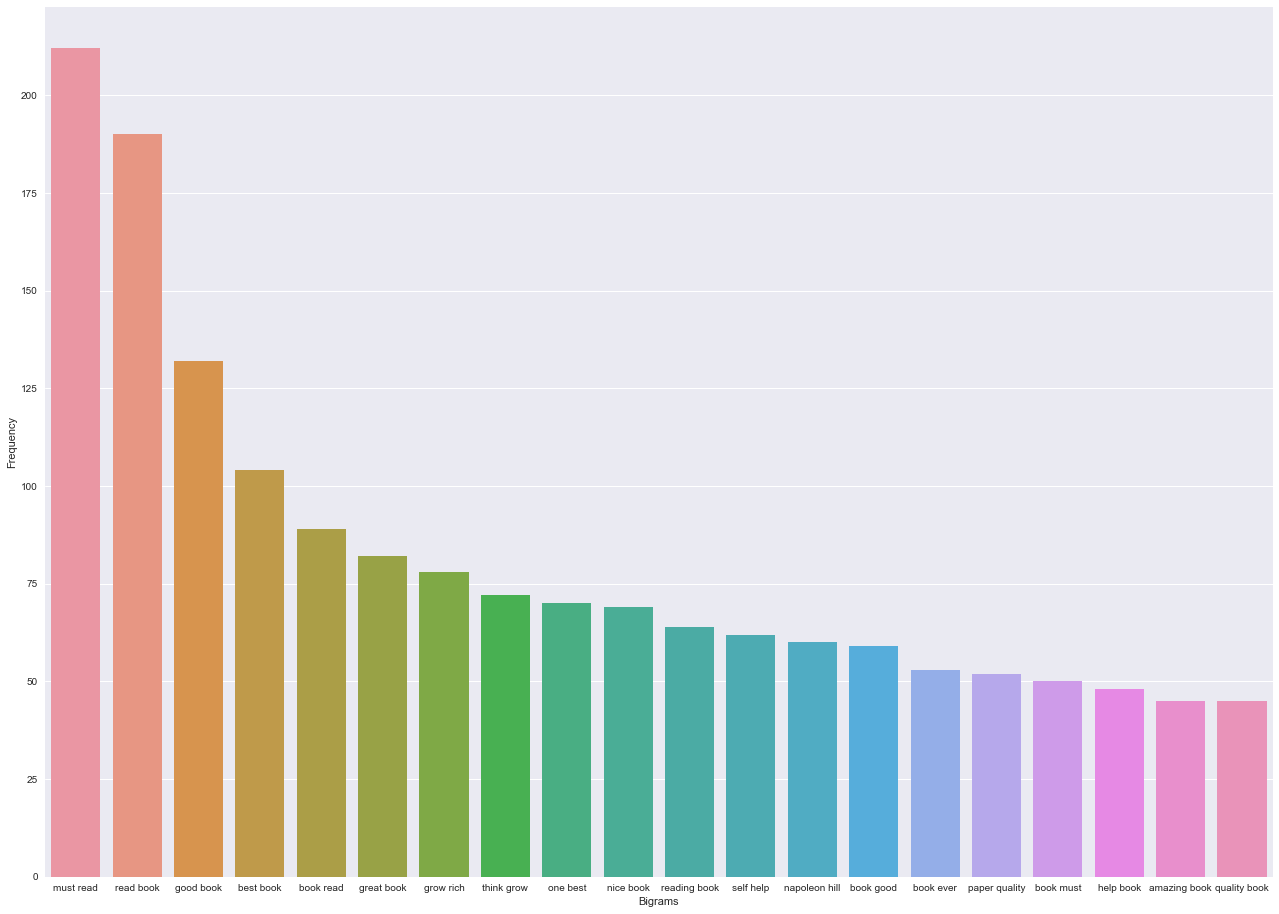

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(22, 16))
sns.barplot(x = "Bigrams", y = "Frequency", data = bigram_df)

## Trigram Analysis

In [40]:
def trigram_word_freq(dataframe, n = None):
    x = CountVectorizer(ngram_range = (3,3)).fit(dataframe)
    bag_of_words = x.transform(dataframe)
    sum_words = bag_of_words.sum(axis=0)
    # word_list = x.vocabulary_.items()
    words_freq = [(word, sum_words[0, idx]) for word, idx in x.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [41]:
trigram_freq = trigram_word_freq(df["normalised_reviews"],20)
trigram_df = pd.DataFrame(trigram_freq, columns = ["Trigrams", "Frequency"])
trigram_df

,Trigrams,Frequency
0,must read book,71
1,think grow rich,60
2,self help book,47
3,one best book,44
4,book must read,38
5,best book ever,31
6,book ever read,28
7,best self help,19
8,best book read,18
9,must read everyone,17


<AxesSubplot:xlabel='Trigrams', ylabel='Frequency'>

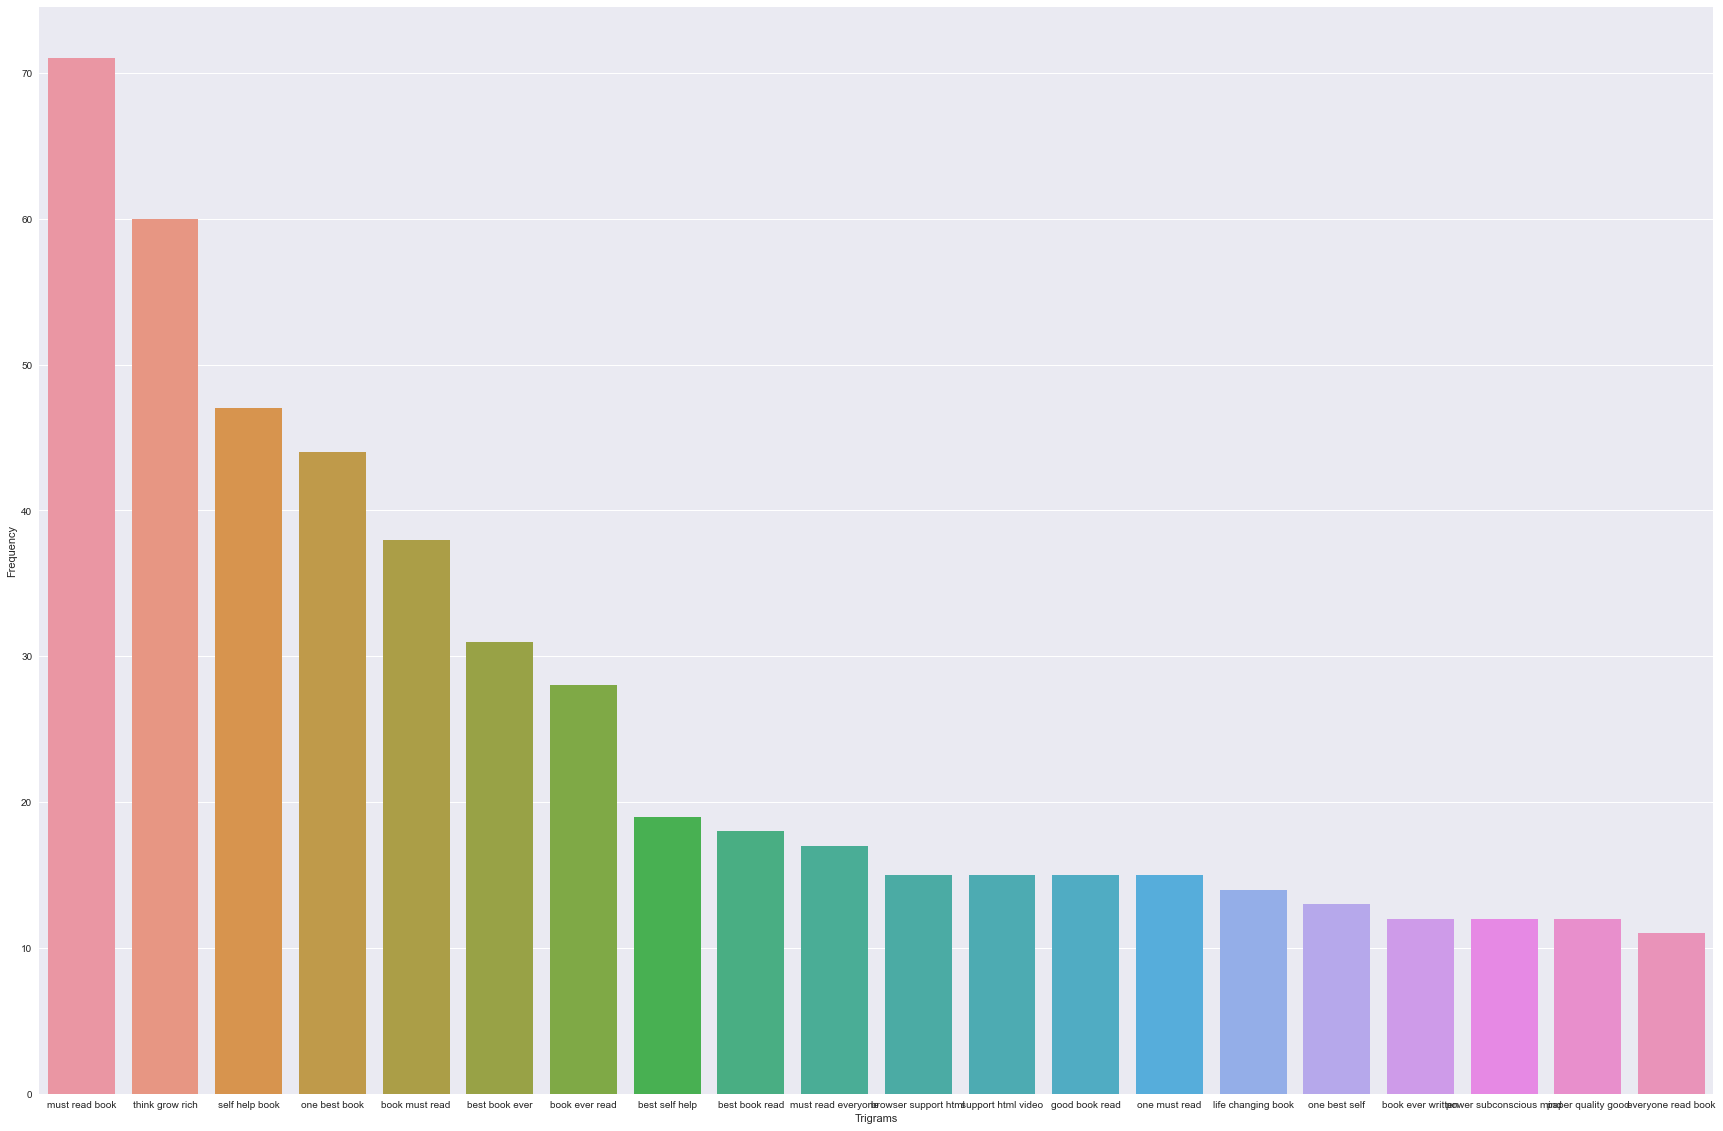

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(30,20))
sns.barplot(x = "Trigrams", y = "Frequency", data = trigram_df)

In [43]:
# ngram_word_freq(df["normalised_reviews"], 20)

In [44]:
# def ngram_word_freq(dataframe, range = None, n = 1):
#     x = CountVectorizer(ngram_range = (n,n)).fit(dataframe)
#     bag_of_words = x.transform(dataframe)
#     sum_words = bag_of_words.sum(axis=0)
#     # word_list = x.vocabulary_.items()
#     words_freq = [(word, sum_words[0, idx]) for word, idx in x.vocabulary_.items()]
#     words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:range]

## Second Phase of Model Building | Vader sentiment analysis (Valence Aware Dictionary and sentiment Reasoner)


In [45]:
# !pip install vaderSentiment

In [46]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [47]:
def analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [48]:
df_vader = df.copy()
df_vader.drop(["sentiment_value","word_count", "sentiment"],axis = 1, inplace=True)
df_vader

,customer,review,normalised_reviews,index
0,Diksha Suman (@beingsheblog),Title: THINK AND GROW RICHAuthor: NAPOLEON H...,title think grow richauthor napoleon hillpubli...,0
1,Naveen Sharma,It took quarter of a century to accumulate i...,took quarter century accumulate information wr...,1
2,SAINATH REDDY,When you face criticism in your life try to ...,face criticism life try turn page book find wa...,2
3,Debojit,I was looking through some of the reviews an...,looking review see people gave five star gave ...,3
4,BhaveshB.O.T™,This book can also be called as Think and Gr...,book also called think grow skill think grow k...,4
...,...,...,...,...
1995,Dipesh,"Can't explain, everyone please read.",explain everyone please read,1994
1996,AkshAr KalathiYa,Book is really nice and print is also good,book really nice print also good,1995
1997,yamjalamallesh,I call it as granddaddy of all inspirational...,call granddaddy inspirational motivational lit...,1996
1998,suprith m,Poor qualityPurchase from other publications,poor qualitypurchase publication,1997


In [49]:
df_vader['scores']  = df_vader['normalised_reviews'].apply(lambda review: analyzer_score(review))
df_vader.head()


,customer,review,normalised_reviews,index,scores
0,Diksha Suman (@beingsheblog),Title: THINK AND GROW RICHAuthor: NAPOLEON H...,title think grow richauthor napoleon hillpubli...,0,"{'neg': 0.018, 'neu': 0.61, 'pos': 0.373, 'com..."
1,Naveen Sharma,It took quarter of a century to accumulate i...,took quarter century accumulate information wr...,1,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp..."
2,SAINATH REDDY,When you face criticism in your life try to ...,face criticism life try turn page book find wa...,2,"{'neg': 0.143, 'neu': 0.586, 'pos': 0.271, 'co..."
3,Debojit,I was looking through some of the reviews an...,looking review see people gave five star gave ...,3,"{'neg': 0.086, 'neu': 0.641, 'pos': 0.273, 'co..."
4,BhaveshB.O.T™,This book can also be called as Think and Gr...,book also called think grow skill think grow k...,4,"{'neg': 0.025, 'neu': 0.633, 'pos': 0.343, 'co..."


In [50]:
df_vader['compound']  = df_vader['scores'].apply(lambda score_dict: score_dict['compound'])

df_vader.head()

,customer,review,normalised_reviews,index,scores,compound
0,Diksha Suman (@beingsheblog),Title: THINK AND GROW RICHAuthor: NAPOLEON H...,title think grow richauthor napoleon hillpubli...,0,"{'neg': 0.018, 'neu': 0.61, 'pos': 0.373, 'com...",0.9873
1,Naveen Sharma,It took quarter of a century to accumulate i...,took quarter century accumulate information wr...,1,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",0.9850
2,SAINATH REDDY,When you face criticism in your life try to ...,face criticism life try turn page book find wa...,2,"{'neg': 0.143, 'neu': 0.586, 'pos': 0.271, 'co...",0.6943
3,Debojit,I was looking through some of the reviews an...,looking review see people gave five star gave ...,3,"{'neg': 0.086, 'neu': 0.641, 'pos': 0.273, 'co...",0.9728
4,BhaveshB.O.T™,This book can also be called as Think and Gr...,book also called think grow skill think grow k...,4,"{'neg': 0.025, 'neu': 0.633, 'pos': 0.343, 'co...",0.9904


In [51]:
def rating_allocator(x):
    if x > 0.05:
        x = "Positive"
    elif x < -0.05:
        x = "Neutral"
    else:
        x = "Negative"
    return x
df_vader["sentiment"] = df_vader["compound"].apply(rating_allocator)
df_vader.head()

,customer,review,normalised_reviews,index,scores,compound,sentiment
0,Diksha Suman (@beingsheblog),Title: THINK AND GROW RICHAuthor: NAPOLEON H...,title think grow richauthor napoleon hillpubli...,0,"{'neg': 0.018, 'neu': 0.61, 'pos': 0.373, 'com...",0.9873,Positive
1,Naveen Sharma,It took quarter of a century to accumulate i...,took quarter century accumulate information wr...,1,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",0.9850,Positive
2,SAINATH REDDY,When you face criticism in your life try to ...,face criticism life try turn page book find wa...,2,"{'neg': 0.143, 'neu': 0.586, 'pos': 0.271, 'co...",0.6943,Positive
3,Debojit,I was looking through some of the reviews an...,looking review see people gave five star gave ...,3,"{'neg': 0.086, 'neu': 0.641, 'pos': 0.273, 'co...",0.9728,Positive
4,BhaveshB.O.T™,This book can also be called as Think and Gr...,book also called think grow skill think grow k...,4,"{'neg': 0.025, 'neu': 0.633, 'pos': 0.343, 'co...",0.9904,Positive


<AxesSubplot:>

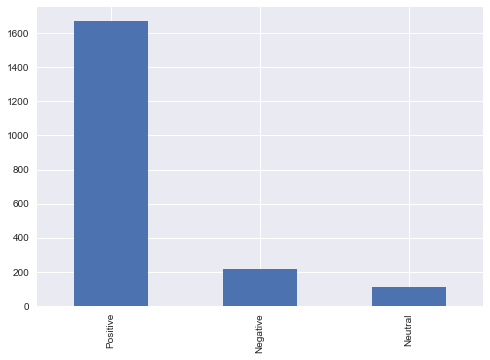

In [52]:
plt.style.use("seaborn")
df_vader.sentiment.value_counts().plot(kind = "bar")

### Machine learning algorithms | Naive Bayes

> Indented block



In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix = vectorizer.fit_transform(df_vader["normalised_reviews"])
df_tfidfvect = pd.DataFrame(data = tf_idf_matrix.toarray(),columns = vectorizer.get_feature_names())
df_tfidfvect


,able,absolutely,achieve,achieve goal,achieve success,action,actually,almost,already,also,...,world,worth,worth buying,worth reading,would,writing,written,year,yes,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097383,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.109185,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.227478,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160723,...,0.000000,0.000000,0.0,0.0,0.275107,0.0,0.000000,0.090100,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092991,...,0.000000,0.000000,0.0,0.0,0.106115,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356072,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0


## Conventional Approach


In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
x = df_tfidfvect
y1 = df_vader["sentiment"]
encoder = LabelEncoder()


0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
1995    Positive
1996    Positive
1997    Positive
1998     Neutral
1999    Positive
Name: sentiment, Length: 1999, dtype: object

In [57]:
encoder.get_params()

{}

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size = 0.25, random_state= 43)

In [61]:
print(f"{x_train.shape} \n{x_test.shape}, \n{y_train.shape}, \n{y_test.shape}")

(1499, 500) 
(500, 500), 
(1499,), 
(500,)


In [62]:
bayes_classifier = MultinomialNB()
bayes_classifier.fit(x_train, y_train)
y_pred = bayes_classifier.predict(x_test)

In [63]:
from sklearn.metrics import (accuracy_score, classification_report, plot_confusion_matrix, 
                             roc_auc_score, roc_curve)
test_accuracy = accuracy_score(y_test,y_pred)


In [64]:
training_accuracy = accuracy_score(y_train, bayes_classifier.predict(x_train))

In [65]:
print(f"Training Accuracy : {training_accuracy}, Test Accuracy = {test_accuracy}")

Training Accuracy : 0.8525683789192795, Test Accuracy = 0.788


#### Here, the training accuracy is a bit more than test accuracy. So it might be a case of over fitting :(

## Using KFold

In [67]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
kfolds = KFold(n_splits=10, random_state=43)
score = cross_val_score(bayes_classifier, x, y1, cv=kfolds)
score

array([0.865     , 0.9       , 0.845     , 0.835     , 0.77      ,
       0.82      , 0.855     , 0.825     , 0.805     , 0.80904523])

In [68]:
acc_bayes = score.mean()*100
acc_bayes

83.29045226130653

## Sampling


In [71]:
from imblearn.over_sampling import RandomOverSampler

In [72]:
sm = RandomOverSampler()

D:\Installation\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

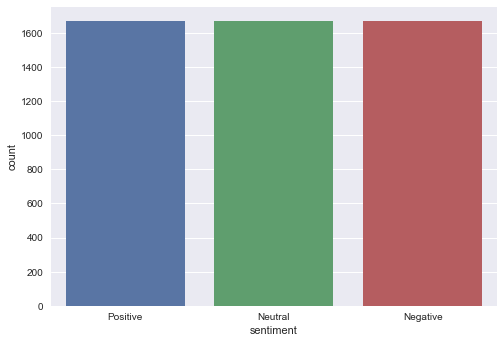

In [73]:
x1,y2=sm.fit_resample(x,y1)
sns.countplot(y2)

In [74]:
from collections import Counter
Counter(y2)

Counter({'Positive': 1668, 'Neutral': 1668, 'Negative': 1668})

## Naive bayes for over sampled data

In [75]:
sampled_bayes = MultinomialNB()
#sampled_bayes.fit(x1,y2)

In [76]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
kfolds = KFold(n_splits=10, random_state=20)
score = cross_val_score(sampled_bayes, x1, y2, cv=kfolds)
score.mean()

D:\Installation\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7309964071856287

In [77]:
sampled_bayes.fit(x1,y2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [78]:
y_pred2=sampled_bayes.predict(x1)

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2,y2)

array([[1504,  150,  141],
       [ 132, 1452,  131],
       [  32,   66, 1396]], dtype=int64)

## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

sampled_rf = RandomForestClassifier(n_estimators=100)
kfolds = KFold(n_splits=10, random_state=20)
sampled_rf_results = cross_val_score(sampled_rf, x1,y2, cv = kfolds)
sampled_rf_results.mean()

D:\Installation\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9572694610778443

In [82]:
sampled_rf.fit(x1,y2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
y_pred=sampled_rf.predict(x1)


In [84]:
 confusion_matrix(y_pred,y2)

array([[1668,   38,   13],
       [   0, 1630,    0],
       [   0,    0, 1655]], dtype=int64)

## SVM

In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
sampled_svm = SVC()

kfolds = KFold(n_splits=10, random_state=20)
sampled_rf_results = cross_val_score(sampled_svm , x1,y2, cv = kfolds)
sampled_rf_results.mean()

D:\Installation\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9786275449101796

In [86]:
sampled_svm.fit(x1,y2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
y_pred1=sampled_svm.predict(x1)

In [88]:
confusion_matrix(y2,y_pred1)

array([[1668,    0,    0],
       [  38, 1630,    0],
       [  14,    1, 1653]], dtype=int64)

In [89]:
sampled_bayes.predict(vectorizer.transform(["book is not that bad ok product can buy"]).toarray())

array(['Neutral'], dtype='<U8')

In [ ]:
#import pickle

In [ ]:
#pickle.dump(sampled_svm,open('E:/svm.pkl','wb'))